In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
file_path = 'Facebook_Marketplace_data.csv'
df = pd.read_csv(file_path)
print(df.head())

   status_id status_type status_published  num_reactions  num_comments  \
0          1       video   4/22/2018 6:00            529           512   
1          2       photo  4/21/2018 22:45            150             0   
2          3       video   4/21/2018 6:17            227           236   
3          4       photo   4/21/2018 2:29            111             0   
4          5       photo   4/18/2018 3:22            213             0   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0         262        432         92         3          1         1   
1           0        150          0         0          0         0   
2          57        204         21         1          1         0   
3           0        111          0         0          0         0   
4           0        204          9         0          0         0   

   num_angrys  Column1  Column2  Column3  Column4  
0           0      NaN      NaN      NaN      NaN  
1           0      NaN      Na

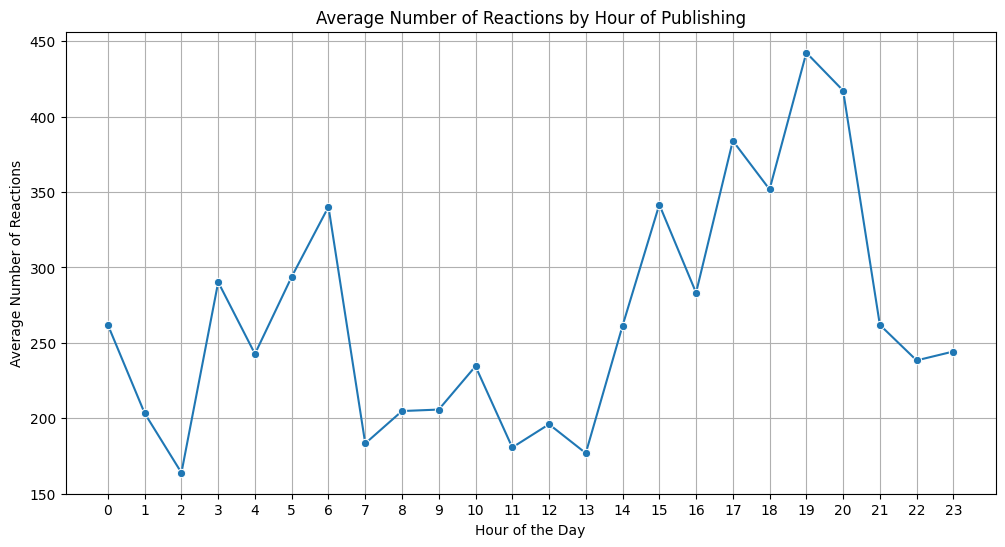

hour_published
0     261.839474
1     203.315725
2     163.907618
3     290.270208
4     242.685864
5     293.870968
6     340.213198
7     183.301549
8     204.796897
9     205.780761
10    234.508333
11    180.639456
12    196.053763
13    176.875000
14    261.333333
15    341.666667
16    283.250000
17    384.000000
18    351.750000
19    442.368421
20    417.288136
21    261.907895
22    238.376126
23    244.276850
Name: num_reactions, dtype: float64


In [14]:
# Remove redundant columns
df_cleaned = df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'])

# Convert 'status_published' to datetime format
df_cleaned['status_published'] = pd.to_datetime(df_cleaned['status_published'])

# Extract the hour of the day from 'status_published'
df_cleaned['hour_published'] = df_cleaned['status_published'].dt.hour

# Calculate the average number of reactions per hour
average_reactions_by_hour = df_cleaned.groupby('hour_published')['num_reactions'].mean()

# Plot the average number of reactions by hour
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_reactions_by_hour.index, y=average_reactions_by_hour.values, marker='o')
plt.title('Average Number of Reactions by Hour of Publishing')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Reactions')
plt.xticks(range(0, 24))  # Ensure all hours are displayed
plt.grid(True)
plt.show()

# Display the average reactions by hour
print(average_reactions_by_hour)


Correlation Matrix:
               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


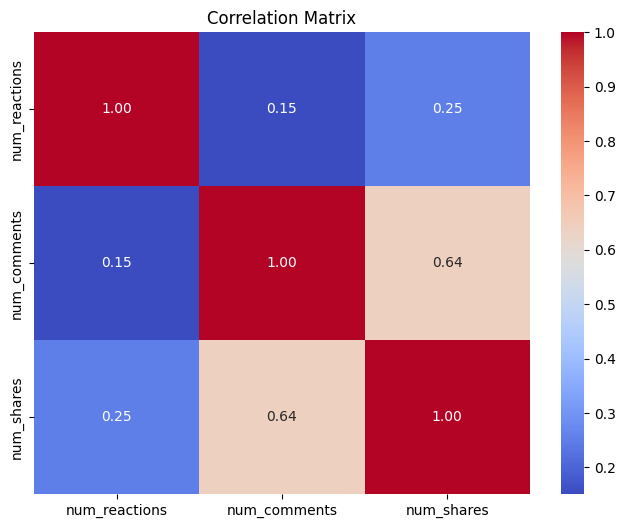

In [13]:
# 2. Is there a correlation between 'num_reactions' and other engagement metrics?

# Calculate the correlation matrix
correlation_matrix = df_cleaned[['num_reactions', 'num_comments', 'num_shares']].corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

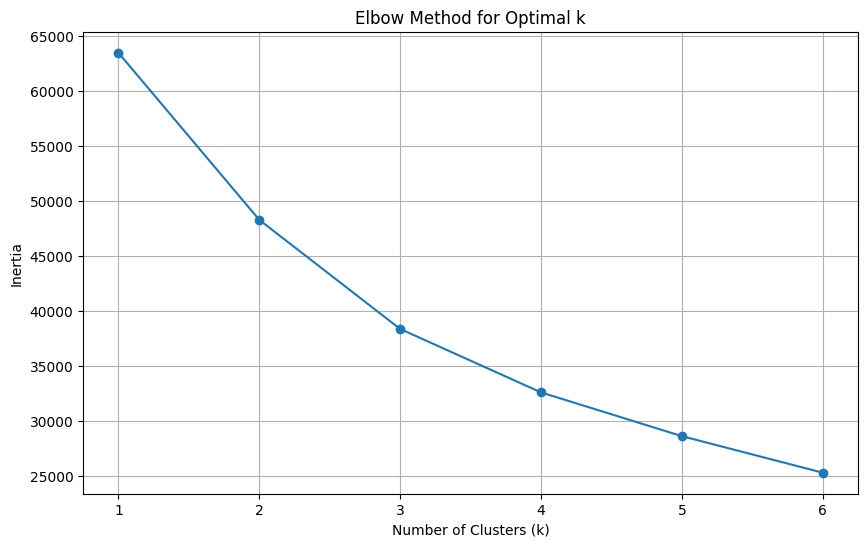

In [12]:
# 3. Train a K-Means clustering model using specified columns

# Columns to be used for clustering
clustering_columns = ['num_reactions', 'num_comments', 'num_shares',
                      'num_likes', 'num_loves', 'num_wows',
                      'num_hahas', 'num_sads', 'num_angrys']

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned[clustering_columns])

# Determine the optimum number of clusters using the elbow method
inertia = []
k_range = range(1, 7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [11]:
# Choose the optimal number of clusters based on the elbow plot
optimal_k = 3

# Fit the K-Means model
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(scaled_features)

# Add cluster labels to the original dataframe
df_cleaned['Cluster'] = kmeans_optimal.labels_

print("\nData with Cluster Labels:")
print(df_cleaned.head())



Data with Cluster Labels:
   status_id status_type    status_published  num_reactions  num_comments  \
0          1       video 2018-04-22 06:00:00            529           512   
1          2       photo 2018-04-21 22:45:00            150             0   
2          3       video 2018-04-21 06:17:00            227           236   
3          4       photo 2018-04-21 02:29:00            111             0   
4          5       photo 2018-04-18 03:22:00            213             0   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0         262        432         92         3          1         1   
1           0        150          0         0          0         0   
2          57        204         21         1          1         0   
3           0        111          0         0          0         0   
4           0        204          9         0          0         0   

   num_angrys  hour_published  Cluster  
0           0               6        0  
1      

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
# 5. Count of different types of posts in the dataset

post_type_counts = df_cleaned['status_type'].value_counts()

print("\nCount of Different Types of Posts:")
print(post_type_counts)


Count of Different Types of Posts:
status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


In [9]:
# 6. Average values of 'num_reactions', 'num_comments', 'num_shares' for each post type

average_engagement_by_post_type = df_cleaned.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()

print("\nAverage Engagement Metrics by Post Type:")
print(average_engagement_by_post_type)


Average Engagement Metrics by Post Type:
             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
